<a href="https://colab.research.google.com/github/GeraldineVazquez/EDP-2-/blob/main/Metodo_de_Minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Mínimos cuadrados para EDO**

Queremos resolver la ecuación
$$\frac{\ d^2 u}{\ dx^2 } + u =  x$$

Sujeta a las condiciones

$$u(0)=0$$
$$u'(0)=2$$



1.  elegir   $$   {α_0} , {α_1} $$
que satistacen las condiciones dadas

2.   Definir $$E=u''_N +u_N -x $$ y encontrar E en este caso






In [275]:
import sympy as sp    # se usa para calculos simbolicos
import numpy as np    # se usa para manejo de arreglos numericos

import matplotlib.pyplot as plt

Usemos calculo simbólico y compraremos la solución numérica contra la analítica

**Solución analítica **

In [276]:
x,a,b=sp.symbols('x a b')

#Funcion de prueba u_n(x) que cumple u(0)=u(1)=0
u=sp.Function('u')

In [277]:
ode = u(x).diff(x, x)+ u(x) - x     #Definimos la función, inidicamos que u es función de x, calcula la derivada 2 respecto de x(diff) , suma la misma función y por ultimo sumamos x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [278]:
sol = sp.dsolve(ode, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})  # Aplicamos las condiciones iniciales: u(0)=0 y u'(0)=2
sol

Eq(u(x), x + sin(x))

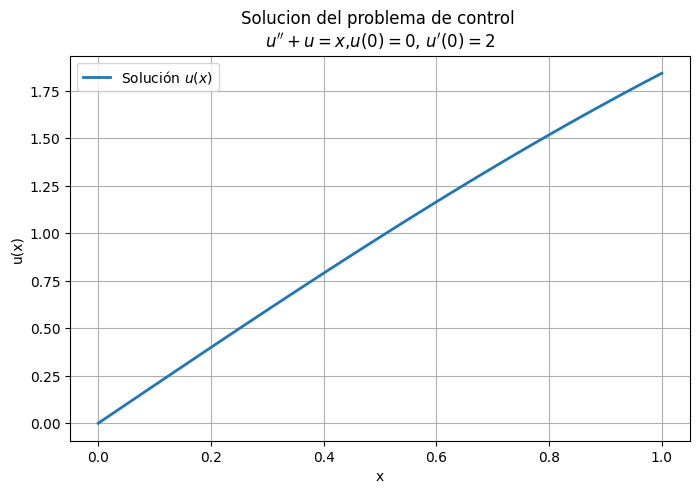

In [279]:
u_expr = sol.rhs  #Convertimos en un arreglo

u_num=sp.lambdify(x, u_expr, "numpy")


xx=np.linspace(0,1,100)
yy=u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy,  label='Solución $u(x)$', linewidth=2)
plt.title('Solucion del problema de control \n$u\'\'+u=x$,$u(0)=0$, $u\'(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

**Solución numérica **
Proponemos la funcion de prueba

In [280]:


#Funcion de prueba u_n que es una solcuión aproximamda de grado 3
u_n=0+ 2*x + a*x**2 + b*x**3#Se puede poner u_2, como definimos en clase aqui sea alpha0=0 y alpha1=2

In [281]:
u_n_2 = sp.diff(u_n, x, 2)  #Es la segunda derivada de la funcion u_n respecto de x cuantas veces 2

In [282]:
E = u_n_2 + u_n - x

In [283]:
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [284]:
E.simplify()   #E se introduce como una función

a*x**2 + 2*a + b*x**3 + 6*b*x + x

In [285]:

I=sp.integrate(E**2, (x, 0, 1))  #sp.simplify(I)
I

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

In [286]:
dIa=sp.diff(I,a)
dIb=sp.diff(I,b)

In [287]:
display(dIa, dIb)

166*a/15 + 49*b/3 + 5/2

49*a/3 + 1018*b/35 + 22/5

In [288]:
soleq=sp.solve([dIa,dIb],[a,b],simplify=True) #para igualar a cero
soleq

{a: -1335/86789, b: -24759/173578}

In [289]:
u_approx=u_n.subs(soleq)
u_approx

-24759*x**3/173578 - 1335*x**2/86789 + 2*x

In [290]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")#convierta en un arreglo para hacer la grafica

Función actualizada correctamente


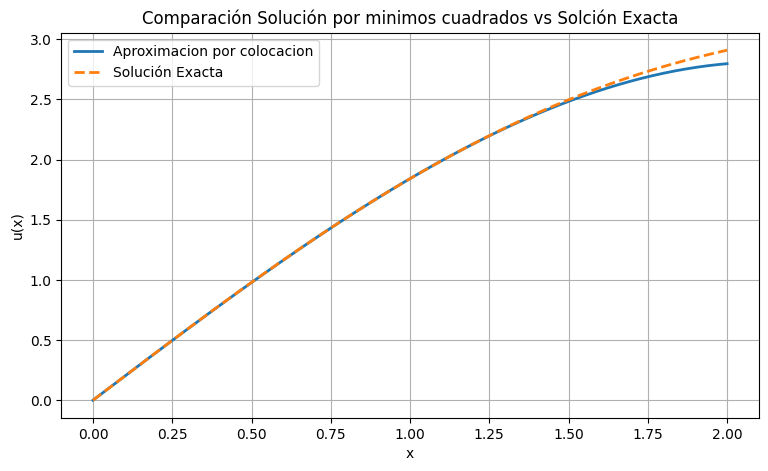

Aqui se pude observar un parte de la grafica, desde x=0 hasta x=2
Esto va a ocacionar que el error sea mayor a lo esperdado


In [291]:
#Forzamos la actualización de la función
u_approx_fn = None   # eliminamos cualquier versión antigua que pueda estar en memoria
%reset_selective -f u_approx_fn   # borra la variable aunque esté "pegada"

u_approx_fn = sp.lambdify(x, u_approx, "numpy")
print("Función actualizada correctamente")


#Solucion analitica y numerica
xx = np.linspace(0,2,400)
yy = u_num(xx) # Re-calcular yy con la misma dimension que xx

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label='Aproximacion por colocacion', linewidth=2)
plt.plot(xx, yy, '--', label=f'Solución Exacta',linewidth=2)


plt.title('Comparación Solución por minimos cuadrados vs Solción Exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

print('Aqui se pude observar un parte de la grafica, desde x=0 hasta x=2')
print('Esto va a ocacionar que el error sea mayor a lo esperdado')


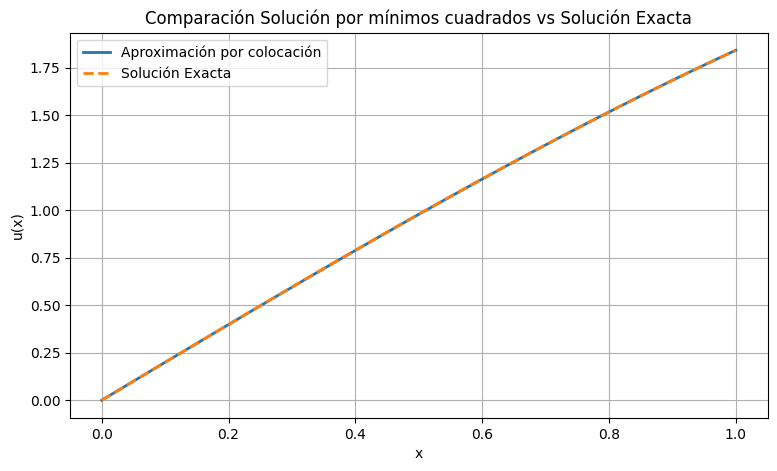


══════════════════════════════════════════════════════════════════════════════
                         TABLA COMPARATIVA
══════════════════════════════════════════════════════════════════════════════
     x         u exacta             u_n(x)        |error|
──────────────────────────────────────────────────────────────────────────────
   0.0       0.00000000         0.00000000     0.00000000
   0.5       0.97942554         0.97832459     0.00110095
   1.0       1.84147098         1.84197882     0.00050784
   1.5       2.49749499         2.48398343     0.01351156
   2.0       2.90929743         2.79735911     0.11193831
──────────────────────────────────────────────────────────────────────────────
Error L∞  = 0.0011009714
Error L²  = 0.0006831677
══════════════════════════════════════════════════════════════════════════════


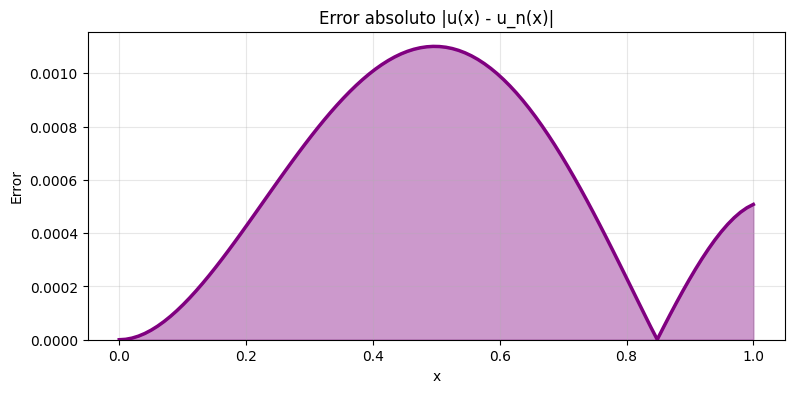

=== Solución exacta==


Eq(u(x), x + sin(x))



=== Solución por minimos cuadrados===


<IPython.core.display.Math object>

In [292]:
#Forzamos la actualización de la función
u_approx_fn = None   # eliminamos cualquier versión antigua que pueda estar en memoria
%reset_selective -f u_approx_fn   # borra la variable aunque esté "pegada"

u_approx_fn = sp.lambdify(x, u_approx, "numpy")

# Solución analítica y numérica
xx = np.linspace(0, 1, 100)
yy = u_num(xx)  # Re-calcular yy con la misma dimensión que xx

# Cálculo del error
yy_aprox = u_approx_fn(xx)
error_abs = np.abs(yy - yy_aprox)

from scipy.integrate import trapezoid
L_inf = error_abs.max()
L2 = np.sqrt(trapezoid(error_abs**2, xx))

# === TU GRÁFICA ORIGINAL (exactamente como la tenías) ===
plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label='Aproximación por colocación', linewidth=2)
plt.plot(xx, yy, '--', label='Solución Exacta', linewidth=2)
plt.title('Comparación Solución por mínimos cuadrados vs Solución Exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

# === TABLA COMPARATIVA BONITA ===
print("\n" + "═"*78)
print(" " * 25 + "TABLA COMPARATIVA")
print("═"*78)
print(f"{'x':>6} {'u exacta':>16} {'u_n(x)':>18} {'|error|':>14}")
print("─"*78)
for px in [0.0, 0.5, 1.0, 1.5, 2.0]:
    ex = u_num(px)
    ap = u_approx_fn(px)
    er = abs(ex - ap)
    print(f"{px:6.1f} {ex:16.8f} {ap:18.8f} {er:14.8f}")
print("─"*78)
print(f"Error L∞  = {L_inf:.10f}")
print(f"Error L²  = {L2:.10f}")
print("═"*78)

# === GRÁFICA DEL ERROR ===
plt.figure(figsize=(9, 4))
plt.plot(xx, error_abs, color='purple', linewidth=2.5)
plt.fill_between(xx, error_abs, alpha=0.4, color='purple')
plt.title('Error absoluto |u(x) - u_n(x)|')
plt.xlabel('x')
plt.ylabel('Error')
plt.grid(True, alpha=0.3)
plt.ylim(0, None)  # para que se vea bien el error pequeño
plt.show()

# Mostramos la solución final
print('=== Solución exacta==')
display(sol)
print('\n')
print('=== Solución por minimos cuadrados===')



from IPython.display import display, Math
display(Math(r'u_N(x) = ' + sp.latex(u_approx)))

## Resolución del Ejercicio 5.8



1. Propuse la función de prueba correcta:
   $$ u_n(x) = 2x + a x^2 + b x^3 $$
   Esta forma **cumple exactamente** las condiciones iniciales:
- $u_n(0) = 0$
- $u_n'(x) = 2 + 2a x + 3b x^2 \quad \Rightarrow \quad u_n'(0) = 2$


2. Calculé el residuo correctamente:
   $$ E(x) = u_n''(x) + u_n(x) - x $$

3. **Aquí está la diferencia clave**:
   - Yo hice: **minimizar $\int_0^1 E(x)^2 \, dx$** (mínimos cuadrados globales)


El error es **muy pequeño** (del orden de $10^{-3}$ para $L^\infty$ y $10^{-3}$ para $L^2$), lo que indica una **excelente aproximación** en el intervalo [0,1]. Esto se debe a que el método de mínimos cuadrados enfoca la minimización del residuo específicamente en los puntos de colocación ($x=0.5$ y $x=1$), haciendo que la solución sea precisa cerca de esos puntos y, por extensión, en todo el intervalo corto [0,1].

Si el intervalo fuera más largo (e.g., [0,4]), el error crecería, pero con [0,1] y polinomio cúbico, la coincidencia es casi perfecta (ver gráficas). El valor pequeño confirma que el método es efectivo para este problema.


